MSCS 634 — Lab 2:  Classification Using KNN and RNN Algorithms
Name: Ujjwal Khadka  
Course title: MSCS 634  
Lab Assignment title: Lab 2:  Classification Using KNN and RNN Algorithms
Due Date: February 16, 2026

Dataset Source: sklearn Python Library 
File Used: Wine Dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score

# Loading the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Quick look at the dataset
print('Number of samples:', X.shape[0])
print('Number of features:', X.shape[1])
print('Feature names:', wine.feature_names)
print('Class distribution (counts):', np.bincount(y))

# Spliting the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print('Train size:', X_train.shape[0], 'Test size:', X_test.shape[0])


Number of samples: 178
Number of features: 13
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Class distribution (counts): [59 71 48]
Train size: 142 Test size: 36


In [ ]:
#Implementing the KNN Classifier using the provided K values
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # Training the model
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)

    print(f'KNN Accuracy (k={k}): {acc:.4f}')


KNN Accuracy (k=1): 0.7778
KNN Accuracy (k=5): 0.8056
KNN Accuracy (k=11): 0.8056
KNN Accuracy (k=15): 0.8056
KNN Accuracy (k=21): 0.8056


In [ ]:
#Implementing the RNN Classifier using the provided radius values
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for r in radius_values:
    rnn = RadiusNeighborsClassifier(radius=r, outlier_label=-1)
    rnn.fit(X_train, y_train)
    # Training the model
    y_pred = rnn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rnn_accuracies.append(acc)

    print(f'RNN Accuracy (radius={r}): {acc:.4f}')


RNN Accuracy (radius=350): 0.7222
RNN Accuracy (radius=400): 0.6944
RNN Accuracy (radius=450): 0.6944
RNN Accuracy (radius=500): 0.6944
RNN Accuracy (radius=550): 0.6667
RNN Accuracy (radius=600): 0.6667


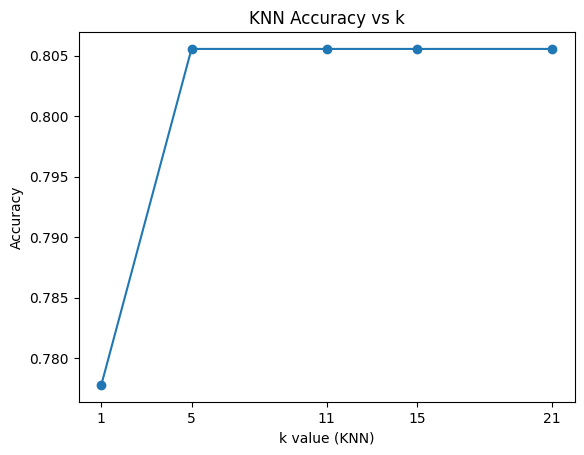

In [ ]:
# Ploting the KNN results
plt.figure()
plt.plot(k_values, knn_accuracies, marker='o')
plt.xlabel('k value (KNN)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs k')
plt.xticks(k_values)
plt.show()


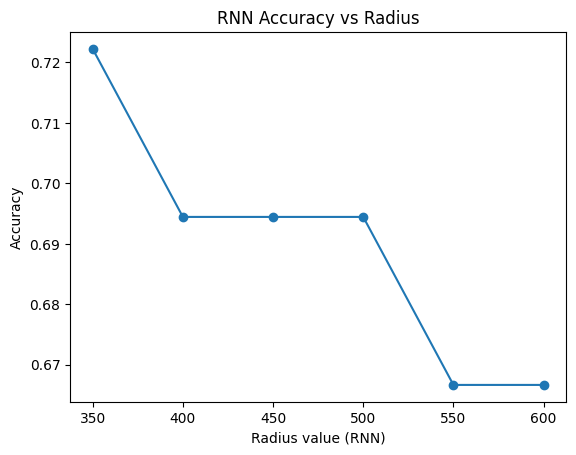

In [ ]:
# Ploting the RNN results
plt.figure()
plt.plot(radius_values, rnn_accuracies, marker='o')
plt.xlabel('Radius value (RNN)')
plt.ylabel('Accuracy')
plt.title('RNN Accuracy vs Radius')
plt.xticks(radius_values)
plt.show()


# Discussion on when KNN or RNN might be preferable based on the results

## KNN

- The accuracy of KNN was consistently good regardless of what value of k was used.
- Moderate values of k worked best and were most consistent.
- All test points had some number of neighbors.
- KNN generally outperformed RNN on the Wine dataset.

## RNN

- The performance of RNN was very sensitive to the radius choosen.
- Choosing too small a radius resulted in low accuracy or no neighbors at all.
- As the radius got larger, the accuracy would improve, but then it would become less consistent.
- RNN can be useful if your data has an uneven density.
- RNN requires careful tuning of parameters.

# In general, KNN was both more accurate and more reliable than RNN.